# Least Squares and Bitcoin
### By J. Sebastian Tenjo G.


In [1]:
using CSV
using DataFrames
dataBitcoin = CSV.read("DataBitcoin/Bitcoin.csv",DataFrame);

In [2]:
println(dataBitcoin)

29×7 DataFrame
 Row │ Date          Price     Open      High      Low       Vol.     Change % 
     │ String15      String15  String15  String15  String15  String7  String7  
─────┼─────────────────────────────────────────────────────────────────────────
   1 │ Mar 07, 2022  38,014.8  38,420.6  38,543.2  37,597.7  2.14B    -1.01%
   2 │ Mar 06, 2022  38,403.1  39,396.3  39,668.1  38,115.0  1.93B    -2.52%
   3 │ Mar 05, 2022  39,395.8  39,142.8  39,600.2  38,626.1  1.50B    0.65%
   4 │ Mar 04, 2022  39,142.7  42,463.0  42,848.7  38,594.9  3.21B    -7.82%
   5 │ Mar 03, 2022  42,463.0  43,912.8  44,077.2  41,840.8  74.11K   -3.30%
   6 │ Mar 02, 2022  43,912.8  44,420.3  45,294.2  43,361.3  80.82K   -1.14%
   7 │ Mar 01, 2022  44,420.3  43,187.2  44,900.5  42,876.6  90.67K   2.85%
   8 │ Feb 28, 2022  43,188.2  37,707.2  43,977.8  37,458.9  108.07K  14.59%
   9 │ Feb 27, 2022  37,689.1  39,116.6  39,838.5  37,062.3  66.14K   -3.65%
  10 │ Feb 26, 2022  39,115.5  39,221.6  40,094.5  38,

### 1.  Related with the nature of the data, which conditions should meet matrices A and b be solvable from the least squares perspective

In [3]:
dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => "");
dataBitcoin.PriceFloat = parse.(Float64, dataBitcoin.Price);

In [4]:
dataBitcoin.Price

29-element Vector{String15}:
 "38014.8"
 "38403.1"
 "39395.8"
 "39142.7"
 "42463.0"
 "43912.8"
 "44420.3"
 "43188.2"
 "37689.1"
 "39115.5"
 "39209.6"
 "38339.2"
 "37224.6"
 ⋮
 "40000.1"
 "40552.8"
 "43883.6"
 "44544.4"
 "42550.3"
 "42061.1"
 "42205.2"
 "42388.4"
 "43521.0"
 "44388.9"
 "44038.2"
 "43833.9"

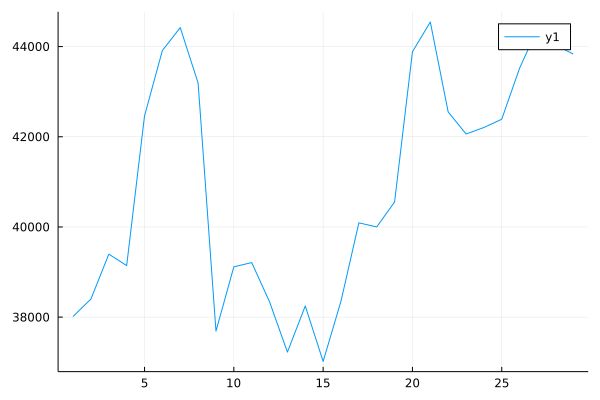

In [5]:
using Plots
plot(dataBitcoin.PriceFloat)

In [6]:
N = size(dataBitcoin.PriceFloat,1);
A = Array((1:N));
b = Array(dataBitcoin.PriceFloat);
A = [ones(N,1) A];
println(A)
println(b)

[1.0 1.0; 1.0 2.0; 1.0 3.0; 1.0 4.0; 1.0 5.0; 1.0 6.0; 1.0 7.0; 1.0 8.0; 1.0 9.0; 1.0 10.0; 1.0 11.0; 1.0 12.0; 1.0 13.0; 1.0 14.0; 1.0 15.0; 1.0 16.0; 1.0 17.0; 1.0 18.0; 1.0 19.0; 1.0 20.0; 1.0 21.0; 1.0 22.0; 1.0 23.0; 1.0 24.0; 1.0 25.0; 1.0 26.0; 1.0 27.0; 1.0 28.0; 1.0 29.0]
[38014.8, 38403.1, 39395.8, 39142.7, 42463.0, 43912.8, 44420.3, 43188.2, 37689.1, 39115.5, 39209.6, 38339.2, 37224.6, 38248.2, 37017.7, 38355.0, 40090.3, 40000.1, 40552.8, 43883.6, 44544.4, 42550.3, 42061.1, 42205.2, 42388.4, 43521.0, 44388.9, 44038.2, 43833.9]


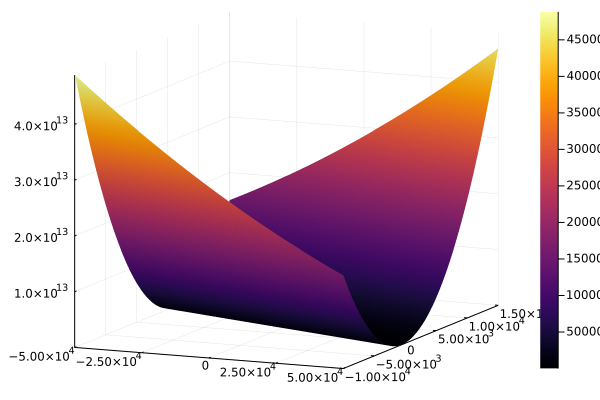

In [7]:
using Plots

function f(x,y) 
    sum((A[:,1]*x+A[:,2]*y-b)*transpose((A[:,1]*x+A[:,2]*y-b)))
end
plot()
surface(-50000:1000:50000,-10000:100:15000, f)

    Updating registry at `C:\Users\tenjo\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\tenjo\herramientaJulia\Project.toml`
  No Changes to `C:\Users\tenjo\herramientaJulia\Manifest.toml`


   Resolving package versions...
  No Changes to `C:\Users\tenjo\herramientaJulia\Project.toml`
  No Changes to `C:\Users\tenjo\herramientaJulia\Manifest.toml`


###  2. Use a least squares for non-linear models adjust the bitcoin price and perform a prediction using the model to determine the future daily price a week ahead, compare with the actual values

### 3.Use least squares to determine the relationship between the bitcoin price and prices of three comodities namely, oil, silved and gold, during the last year.

### 4. Solve the [point set registration problem](https://en.wikipedia.org/wiki/Point-set_registration). Hint (check: S. Umeyama, Least-Squares Estimation of Transformation Parameters Between Two Point Patterns, IEEE Trans. Pattern Anal. Mach. Intell., vol. 13, no. 4, 1991). Construct a GUI to test.

The point set registration problem acording to the information that i was reading has de purpose of estimate the transformation between to or more point sets, and it is really useful when we want to compare tow images, or maybe the same picture but in diferent position. In the literature some algorithms are famous for the efficent solution of this problem, but it is a homework about least squares and one posibillite is solve the problem with the *Single Value Decompositivon (SVD)*. Given two point sets $P$ and $P^{-1}$ the idea is writing the relation between like:
$$ P^{-1}= RP + T + N $$

Here, $R$ is the rotation matriz, $T:$ is the translation matrix and finally $N$ is a noise vector. Of course we want find $R,T$ and minimize the function

$$  F = \sum_{n=1}^{N}(P^{-1}- (RP + T))^{2}$$ This idea is implemented by Arun, Huang et al. Least Square Fitting of Two 3-D Point Sets:https://ieeexplore.ieee.org/document/4767965

Of course, more calculations are required, but the basic idea is that if the minimization problem can be solved, a comparison can be made between the two sets and a solution to the problem can be found. 

With this motivation i start my solution with the sets $P = x_{i}$ and $P^{-1} = y_{i}; i \in \{ 1, 2, \dots , N)$. Lets start with a simple parametrization of a fish. And i choose 200 point in the boundary of the figure. The graph is shown below. The main idea is build a first fish and then work with a new fish with a rotation and diferente position to compare the two image.



In [13]:
using LinearAlgebra
using Random

In [35]:
#Parametrization of the fish 
fx(t) = -(8*cos(t)- 8*sin(t)*sin(t)/(sqrt(2)));
fy(t) = 8*cos(t)*sin(t);
#Points in the boundary and the limits of the figure
N = 200;
tl = LinRange(0, 2π, N);

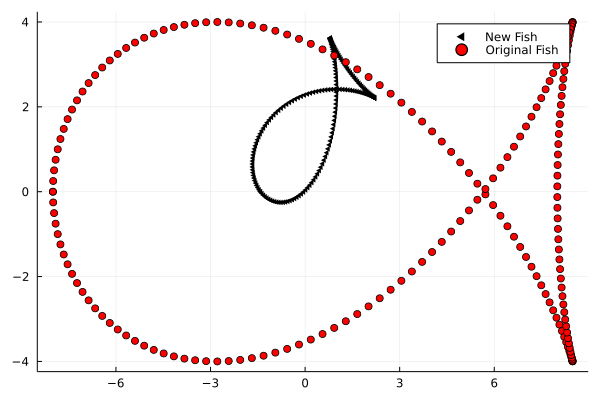

In [47]:
#This code is the construction of the graph, and i need evaluate the points in the parametrizations between the limit of 0, 2pi
ti = LinRange(1, 1, N)
#I introduce a rotational value and this reflect in the black fish in the graph below
x_1 = fx.(tl)*0.25 + ti;
x_2 = fy.(tl)*0.25 + ti;
y_1 = fx.(tl);
y_2 = fy.(tl); 
#There are two components P = X an P^{-1} = Y 
X = [x_1 x_2];
Y = [y_1 y_2]
#Introduce a rotation 
θ = π/4;
M = Array([cos(θ) -sin(θ); sin(θ) cos(θ)]);
for i = 1:N
    X[i, :] = M*X[i, :]
end
using Plots
scatter(X[:, 1], X[:, 2],label = "New Fish",markershape = :ltriangle, linestyle = :dashdot, color = [:black :orange])
scatter!(Y[:, 1], Y[:, 2],label = "Original Fish",markershape = :circle, linestyle = :dashdot, color=:red)

We define the mean vectors $\mu_x$, $\mu_y$ of $X$, $Y$ respectively, by The variance of the mean vectors $\sigma_x^2$ and $\sigma_y^2$ of $X$ and $Y$ respectively, is defined as

\begin{equation*}
\mu_x = \frac{1}{N} \sum_{i = 1}^{N} \textbf{x}_i ; \hspace{0,4cm} \sigma_x^2 = \frac{1}{N} \sum_{i=1}^{N} ||\textbf{x}_i - \textbf{$\mu$}_x||^2
\end{equation*}

\begin{equation*}
\mu_y = \frac{1}{N} \sum_{i = 1}^{N} \textbf{y}_i;\hspace{0,4cm} \sigma_y^2 = \frac{1}{N} \sum_{i=1}^{N} ||\textbf{y}_i - \textbf{$\mu$}_y||^2
\end{equation*}




In [53]:
function mu(points)
    μ = fill(0,2);
    for i = 1:N
        μ += points[i, :];
    end
    μ = (1/N)*μ;
end

μ_x = mu(X);
μ_y = mu(Y);
function sigmap(points, miu)
    σ = 0;
    for i = 1:N
        σ += (norm(points[i, :] - miu))^2;
    end
    σ = (1/N)*σ;
end

σ_x = sigmap(X, μ_x);
σ_y = sigmap(Y, μ_y)

44.36334279912979

In [55]:
Σ_x_y = fill(0,2,2);
for i = 1:N
    Σ_x_y += (Y[i, :] - μ_y)*transpose(X[i, :] - μ_x);
end
Σ_x_y = (1/N)*Σ_x_y 
#Singular Value Descomposition
U, D, V = svd(Σ_x_y)

SVD{Float64, Float64, Matrix{Float64}}
U factor:
2×2 Matrix{Float64}:
 -1.0          5.55112e-17
  3.69257e-17  1.0
singular values:
2-element Vector{Float64}:
 9.100835699782447
 1.9900000000000002
Vt factor:
2×2 Matrix{Float64}:
 -0.707107  -0.707107
 -0.707107   0.707107

In [56]:
m = size(D, 1);

if rank(Σ_x_y) >= m-1
    if det(Σ_x_y) >= 0
        S = 1*I(m);
    else 
        S = 1*I(m)
        S[m,m] = -1;
    end
elseif rank(Σ_x_y) == m-1
       if det(U)*det(V) == 1
            S = 1*I(m);
       elseif det(U)*det(V) == -1
            S = 1*I(m);
            S[m,m] = -1;
       end
end

2×2 Diagonal{Int64, Vector{Int64}}:
 1  ⋅
 ⋅  1

In [57]:
R = U*S*transpose(V);
c = (1/σ_x)*tr(diagm(D)*S);
t_r = μ_y - c*R*μ_x;
display(R)
display(c)
display(t_r)

2×2 Matrix{Float64}:
  0.707107  0.707107
 -0.707107  0.707107

3.999999999999999

2-element Vector{Float64}:
 -4.000000000000002
 -3.9999999999999982

In [58]:
# Calculation of errors
e_2 = 0;
for i = 1:N
    e_2 += (norm(Y[i, :]-(c*R*X[i, :] + t_r)) )^2
end
e_2 = (1/N)* e_2;

ϵ_2 = σ_y - tr(diagm(D)*S)^2/σ_x;

display(e_2)
display(ϵ_2)

1.7580107732115102e-29

7.105427357601002e-15

In [59]:
X̂ = fill(0., N, m);

for i = 1:N
    X̂[i,:] = c*R*X[i, :]+t_r
end

display(X̂)

200×2 Matrix{Float64}:
 -8.0       4.44089e-16
 -7.99038   0.252423
 -7.96153   0.503839
 -7.91354   0.753247
 -7.84653   0.999652
 -7.7607    1.24207
 -7.65628   1.47954
 -7.53354   1.71111
 -7.39284   1.93586
 -7.23455   2.1529
 -7.0591    2.36135
 -6.86697   2.56038
 -6.65868   2.74922
  ⋮        
 -6.86697  -2.56038
 -7.0591   -2.36135
 -7.23455  -2.1529
 -7.39284  -1.93586
 -7.53354  -1.71111
 -7.65628  -1.47954
 -7.7607   -1.24207
 -7.84653  -0.999652
 -7.91354  -0.753247
 -7.96153  -0.503839
 -7.99038  -0.252423
 -8.0      -8.88178e-16

┌ Info: Saved animation to 
│   fn = C:\Users\tenjo\herramientaJulia\tmp.gif
└ @ Plots C:\Users\tenjo\.julia\packages\Plots\5S9Hg\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\tenjo\\herramientaJulia\\tmp.gif")
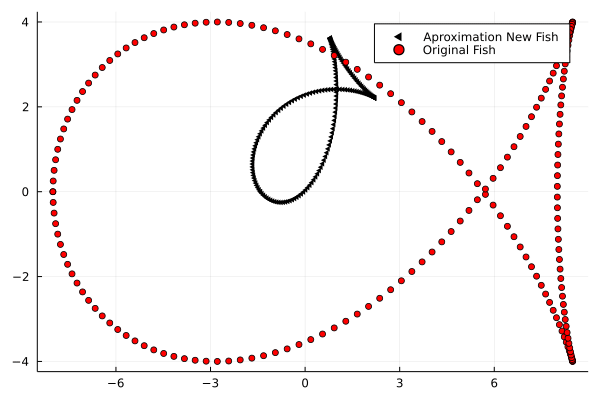

In [61]:
β = acos(R[1,1]);
Rot = Array([cos(β) -sin(β); sin(β) cos(β)]);
        
if (1. + ((c-1.)/β))*X*transpose(Rot) + ones(N,m)*diagm(t_r) == X̂
    β = β
else
    β = -β
end

@gif for i in range(0, β, 100)
         Rot = Array([cos(i) -sin(i); sin(i) cos(i)])
         Z = (1. + ((c-1.)/β)*i)*X*transpose(Rot) + (i/β)*ones(N,m)*diagm(t_r)
         scatter(Z[:,1], Z[:, 2], label = "Aproximation New Fish",markershape = :ltriangle, linestyle = :dashdot, color = [:black :orange])
         scatter!(Y[:, 1], Y[:, 2], label = "Original Fish ",color=:red)
end 